In [1]:
from qiskit import *
from qiskit.primitives import *
from qiskit.circuit.library import *
from qiskit.visualization import *
from math import *

In [2]:
def generate_marked_states(k, intList):
    num_qubits = ceil(log2(max(intList) + 1))
    return [f"{i:0{num_qubits}b}" for i in range(k) if i in intList]

In [3]:
def grover_oracle(k, intList):
    num_qubits = ceil(log2(max(intList) + 1))
    marked_states = generate_marked_states(k, intList)
    qc = QuantumCircuit(num_qubits)

    for target in marked_states:
        zero_inds = [i for i, bit in enumerate(reversed(target)) if bit == '0']
        qc.x(zero_inds)

        if num_qubits > 1:
            qc.h(num_qubits - 1)
            qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)
            qc.h(num_qubits - 1)
        else:
            qc.z(0)

        qc.x(zero_inds)
    return qc

In [4]:
k = 7
intList = [4,9,11,14,1,13,6,15]
markedStateLen = len(generate_marked_states(k, intList))
oracle = grover_oracle(k, intList)

In [5]:
grover_op = GroverOperator(oracle)
theta = asin(sqrt(k / 2**ceil(log2(max(intList) + 1))))
optimal_num_iterations = floor(pi / (4 * asin(sqrt(markedStateLen / 2**grover_op.num_qubits))))

AttributeError: 'GroverOperator' object has no attribute 'numQubits'

In [ ]:
qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits))
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
qc.measure_all()

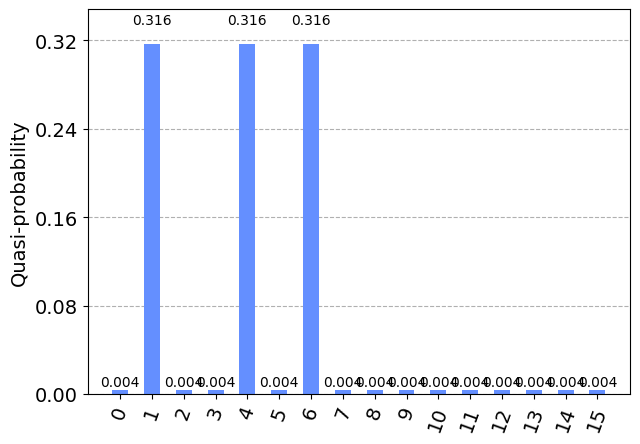

In [ ]:
sampler = Sampler()
sampler.options.default_shots = 1024
sampler.options.seed = 42

result = sampler.run(qc).result()
dist = result.quasi_dists
plot_distribution(dist)

In [ ]:
allSamples = dist[0]
topSamples = sorted(allSamples.items(), key=lambda x: x[1], reverse=True)[:markedStateLen]
topKeys = [key for key, value in topSamples]
print(f"Top samples: {topKeys}")

Top samples: [1, 4, 6]
